# Preporssing of the French National data on the COVID19 epidemic

This norbook aim at prodiding a first look at the French National data on the COVID19 epidemic
It takes the data from https://github.com/opencovid19-fr/data and build dateframe and a matrix $X$ (actualy a dim 2 numpy array), with the days as lines and the region as comumns such that $X_{ij}$ is the total numer of cases detected day $i$ in region $j$.



## Load the data.  
The data from https://github.com/opencovid19-fr/data is updated evry day.
a dataframe is build based on this data

If needed, you can download the file 

In [82]:
import numpy as np
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv',error_bad_lines=False)
#df=pd.read_csv('chiffres-cles.csv',error_bad_lines=False)

## Data cleening

Replace NaN by 0

In [83]:
df["cas_confirmes"].fillna(0,inplace=True)
df["deces"].fillna(0,inplace=True)
df["reanimation"].fillna(0,inplace=True)
df.head(2)

,date,granularite,maille_code,maille_nom,cas_confirmes,deces,reanimation,source_nom,source_url,source_type
0,2020-01-24,departement,DEP-16,Charente,0.0,0.0,0.0,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante
1,2020-01-24,departement,DEP-17,Charente-Maritime,0.0,0.0,0.0,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante


Unify regions and deptment names by removing '-'

In [84]:
df['maille_nom'] = df['maille_nom']\
                          .astype(str).str.replace(r"-", ' ')
df.head(2)

,date,granularite,maille_code,maille_nom,cas_confirmes,deces,reanimation,source_nom,source_url,source_type
0,2020-01-24,departement,DEP-16,Charente,0.0,0.0,0.0,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante
1,2020-01-24,departement,DEP-17,Charente Maritime,0.0,0.0,0.0,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante


Convert date in datetime64 to be able to count days

In [85]:
df['date'] = pd.to_datetime(df['date'])
df['date'].apply(lambda x:x.toordinal())

df.dtypes

date             datetime64[ns]
granularite              object
maille_code              object
maille_nom               object
cas_confirmes           float64
deces                   float64
reanimation             float64
source_nom               object
source_url               object
source_type              object
dtype: object

## Visualization 

Visualize available data for France

/Users/stephane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


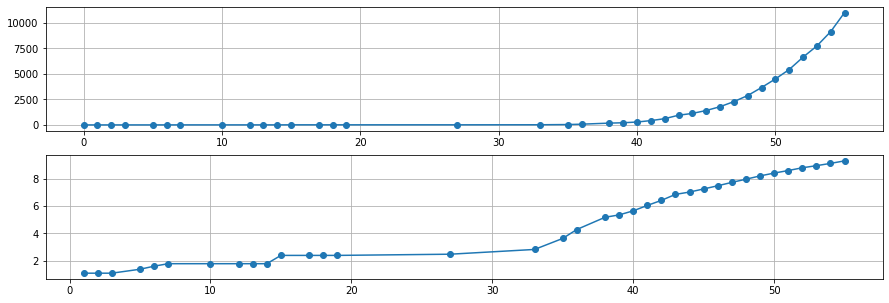

In [86]:
df_france = df[df['granularite'].isin(['pays'])]
date = df_france['date'].values
date = (date-date[0])/np.timedelta64(1, 'D')

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(date.astype(int),df_france['cas_confirmes'],'o-')
plt.grid()

plt.subplot(2,1,2)
plt.plot(date.astype(int),np.log(df_france['cas_confirmes']),'o-')
plt.grid()
plt.show()

Prepare the convertion of the datetime into an int.  
To this end, we nee to know the date of the first day of data (date_0) and the total numer of days rezcorded (nb_jour)

In [87]:
df_r = df[df['granularite'].isin(['region'])]
date = df_r['date'].values
date_0 = date[0]
df_r['date'] -= date_0                                                # generates a warning to be treated
nb_jour = ((date[-1]-date[0])/np.timedelta64(1, 'D')).astype(int)

/Users/stephane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Build a matrix X (actualy a dim 2 numpy array),  
with the days as lines and the region as comumns such that $X_{ij}$ is the total numer of cases detected day $i$ in region $j$.  

Note that we select only data comming from 'Santé publique France'

In [77]:
regions = df[df['granularite'].isin(['region'])]['maille_nom'].unique()
X = np.zeros((nb_jour+1,len(regions)))

for i,r in enumerate(regions):
    region = df_r[df_r['maille_nom'].isin([r])]
    region = region[region['source_nom'].isin(['Santé publique France'])]
    date = region['date']
    d = date/np.timedelta64(1, 'D')
    cas_confirmes = region['cas_confirmes'].values
#    print(r,d,cas_confirmes)
    X[d.astype(int),i] = cas_confirmes


### Visualize data by region

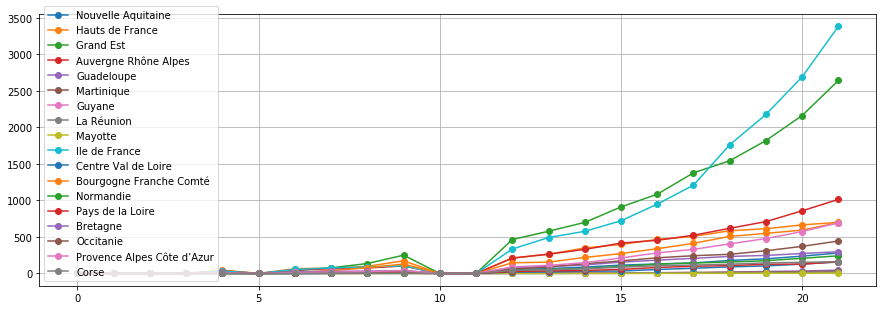

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(X[34:,:],'o-')
plt.legend(regions,loc='lower left')
plt.grid()
plt.show()

Let's have de a look to Normandie data

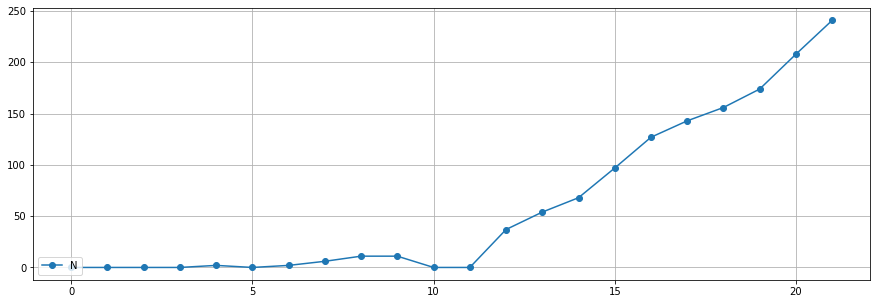

In [78]:
plt.figure(figsize=(15,5))
plt.plot(X[34:,12],'o-')
plt.legend(regions[12],loc='lower left')
plt.grid()
plt.show()

Let's have a look to the whole matrix

In [79]:
print(regions[:14])
print(X[34:,:14].astype(int))
print(X[34:,14:].astype(int))

['Nouvelle Aquitaine' 'Hauts de France' 'Grand Est' 'Auvergne Rhône Alpes'
 'Guadeloupe' 'Martinique' 'Guyane' 'La Réunion' 'Mayotte' 'Ile de France'
 'Centre Val de Loire' 'Bourgogne Franche Comté' 'Normandie'
 'Pays de la Loire']
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    9    1   11    0    0    0    0    0    9    0    4    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   4   45   12   37    0    0    0    0    0   34    0    8    2    5]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5   65   38   49    0    0    0    0    0   55    0   16    2    7]
 [   8   74   77   64    0    0    5    0    0   76    2   39    6    8]
 [  11   97  136   75    0    2    5    0    0   89   11   78   11   16]
 [  17  173  250  102    0    2    5    0    0  104   16  129   11   18]
 [   0    0    0    0    0    0    0  

### Data per department

We can do the same per deptament, but the data doen't seem to be that relevant.
Some more work is needed to aglomerate the data

In [80]:
df_d = df[df['granularite'].isin(['departement'])]
date = df_d['date'].values
date_0 = date[0]
df_d['date'] -= date_0
nb_jour_d = ((date[-1]-date[0])/np.timedelta64(1, 'D')).astype(int)

departements = df[df['granularite'].isin(['departement'])]['maille_nom'].unique()
Xd = np.zeros((nb_jour_d+1,len(departements)))

for i,d in enumerate(departements):
    dep = df_d[df_d['maille_nom'].isin([d])]
#                                               we need to take the max by day
    date = dep['date']
    d = date/np.timedelta64(1, 'D')
    cas_confirmes = dep['cas_confirmes'].values
    Xd[d.astype(int),i] = cas_confirmes

/Users/stephane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


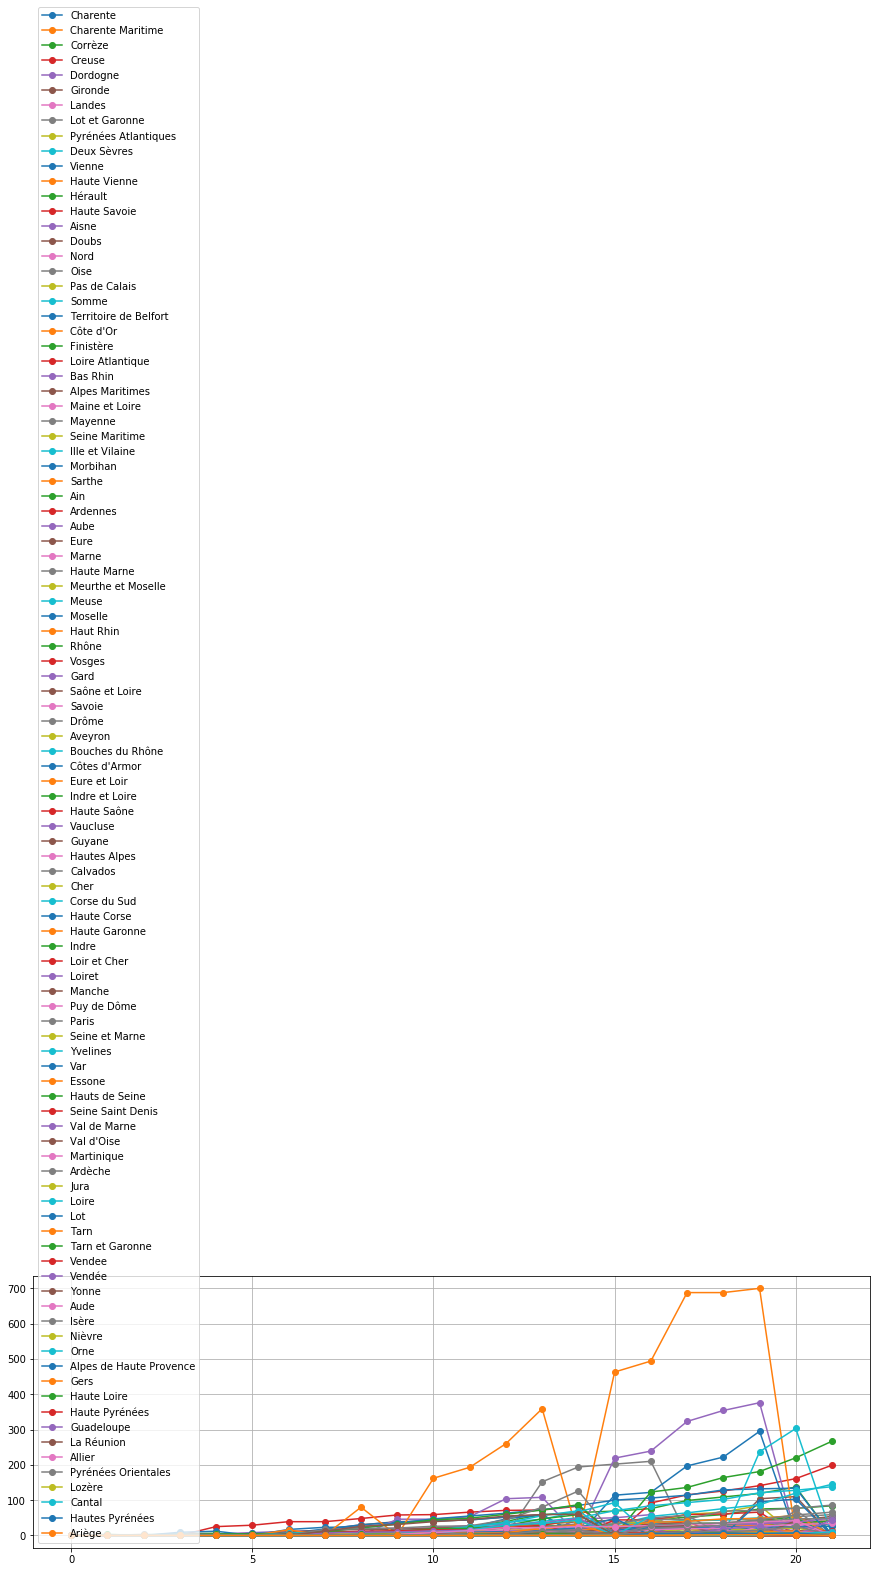

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(Xd[34:,:],'o-')
plt.legend(departements,loc='lower left')
plt.grid()
plt.show()